In [4]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

In [10]:
rating_data_pd = pd.read_csv(
    "../data/ml-100K/training_set_seed123_ml100k.csv",
    sep=",",
    names=["userID", "itemID", "Rating"],
)
rating_data = rating_data_pd.to_numpy()
rating_data.__len__()
rating_data_pd

,userID,itemID,Rating
0,101,177,4
1,101,289,4
2,101,153,4
3,101,361,4
4,101,321,4
...,...,...,...
79034,724,551,5
79035,724,51,4
79036,724,1014,4
79037,724,98,3


In [12]:

movie = '../data/ml-100K/i_id_mapping_genre.csv'

df_movie = pd.read_csv(movie, sep='\t')
print(f'shape: {df_movie.shape}')


df_movie.columns = ["item_id", "Name","genres","itemID"]
df_movie[:4]
movies = df_movie.sort_values(by="itemID")
unique_genres = [
    "Action",
    "Thriller",
    "Romance",
    "Western",
    "Children's",
    "Mystery",
    "Fantasy",
    "Film-Noir",
    "Documentary",
    "Comedy",
    "Adventure",
    "Sci-Fi",
    "Horror",
    "Crime",
    "Musical",
    "War",
    "Animation",
    "Drama",
]
for genre in unique_genres:
    movies[genre] = 0
    
for index, row in movies.iterrows():
    genres = row["genres"].split("|")
    for genre in genres:
        movies.at[index, genre] = 1
movies

movies = movies.drop(columns=["item_id"])
movies = movies.sort_values(by="itemID")
movies

shape: (1348, 4)


,Name,genres,itemID,Action,Thriller,Romance,Western,Children's,Mystery,Fantasy,...,Documentary,Comedy,Adventure,Sci-Fi,Horror,Crime,Musical,War,Animation,Drama
0,Kolya (1996),Comedy,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,L.A. Confidential (1997),Thriller|Mystery|Film-Noir|Crime,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Heavyweights (1994),Children's|Comedy,2,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Legends of the Fall (1994),Romance|Western|War|Drama,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Jackie Brown (1997),Crime|Drama,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,American Buffalo (1996),Drama,1343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1344,A Chef in Love (1996),Comedy,1344,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1345,Nénette et Boni (1996),Drama,1345,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1346,Hollow Reed (1996),Drama,1346,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
users = pd.read_csv("../data/ml-100k/u_id_mapping_demographic_.csv", sep="\t")
# users
users = users.sort_values(by="userID")
users = users.drop(columns=users.columns[0])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
# user_features_numpy = users.to_numpy()
users

,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,49,0,writer,55105,0,20
185,39,1,executive,00000,1,6
21,25,0,writer,40206,2,20
243,28,0,technician,80525,3,19
165,47,0,educator,55113,4,3
...,...,...,...,...,...,...
938,26,1,student,33319,938,18
935,24,0,other,32789,939,13
929,28,1,scientist,07310,940,17
919,30,1,artist,90008,941,1


In [19]:
# model a = mf
# model b = pmf
# model c = vaecf
# model d = neumf
mf_before = [0.0143667937352114,
 0.0012905958206254474,
 0.01204422010079139,
 0.03912722801828931]
mf_after= [0.002223626190097685,
 0.0013002679697345168,
 0.0012948380178379446,
 0.0088453031116715]
wmf_before = [0.026379923906363748,
 0.004915944979282734,
 0.018002875610420903,
 0.06334013428171258]
wmf_after= [0.0023722164512873737,
 0.0013540291545869887,
 0.0007588638322883987,
 0.006076557038020432]
vaecf_before = [0.03322845623080378,
 0.005992241962638088,
 0.01029708637121487,
 0.03647536985022256]
vaecf_after = [0.004820685364702613,
 0.0010268725921047093,
 0.0023798542380830587,
 0.003429994365769227]
neumf_before = [0.027036916343763817,
 0.019470460578806796,
 0.021122518379913604,
 0.06567547483707818]
neumf_after = [0.0023832320029067195,
 0.0013921901404730665,
 0.002517790852163617,
 0.002180739126369682]


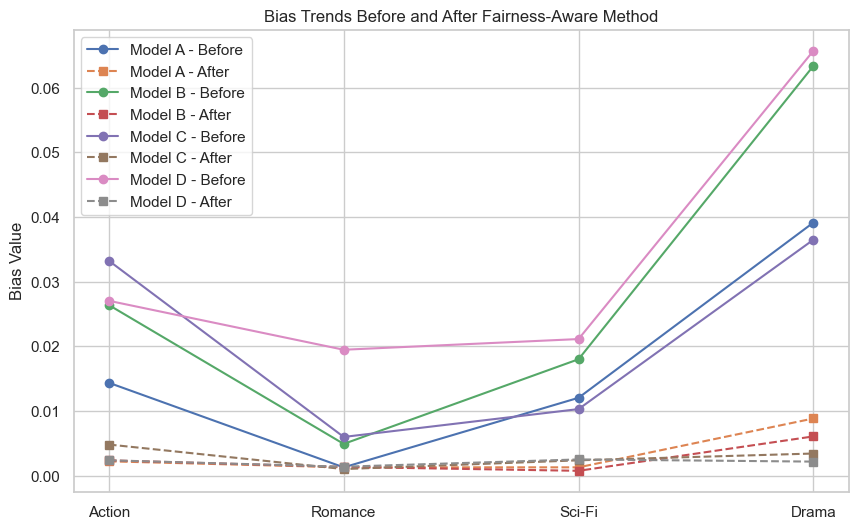

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["Model A", "Model B", "Model C", "Model D"]

# Bias values (before applying fairness)
bias_before_age = np.array([
   mf_before,  # Model A
    wmf_before,  # Model B
    vaecf_before,  # Model C
    neumf_before,  # Model D
])

# Bias values (after applying fairness)
bias_after_age = np.array([
    mf_after,  # Model A
   wmf_after,  # Model B
 vaecf_after,  # Model C
  neumf_after,  # Model D
])

# Calculate percentage reduction
percentage_reduction = ((bias_before_age - bias_after_age) / bias_before_age) * 100

# --- Plot 1: Percentage Reduction Bar Chart ---
# fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(categories))

# for i, model in enumerate(models):
#     ax1.bar(x + i * bar_width, percentage_reduction[i], width=bar_width, label=f"{model}")

# ax1.set_xticks(x + bar_width * (len(models) / 2))
# ax1.set_xticklabels(categories)
# ax1.set_ylabel("Bias Reduction (%)")
# ax1.set_title("Percentage Reduction in Bias Across Categories")
# ax1.legend()
# plt.show()

# --- Plot 2: Line Plot of Bias Trends ---
fig, ax2 = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax2.plot(categories, bias_before_age[i], marker="o", linestyle="-", label=f"{model} - Before")
    ax2.plot(categories, bias_after_age[i], marker="s", linestyle="--", label=f"{model} - After")

ax2.set_ylabel("Bias Value")
ax2.set_title("Bias Trends Before and After Fairness-Aware Method")
ax2.legend()
plt.show()
#age


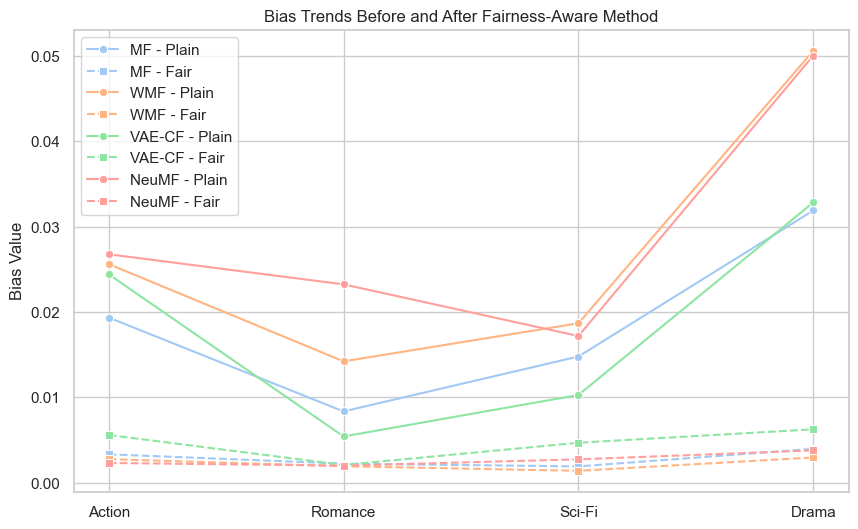

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]

# Bias values (before applying fairness)
bias_before_occ = np.array([
   [0.019344216990970733,
 0.008358959112723276,
 0.014786473597634254,
 0.0318801955556957],  # Model A
   [0.025601604165539277,
 0.014218965736360048,
 0.018675735358788262,
 0.05057248532638675],  # Model B
 [0.024408588279847182,
 0.005427995613159867,
 0.010283023578555428,
 0.03281925178619222],  # Model C
   [0.02675541278673631,
 0.023232542772268366,
 0.017187343953480996,
 0.05001548950958949],  # Model D
])

# Bias values (after applying fairness)
bias_after_occ = np.array([
    [0.0033406509705712637,
 0.0022420130619635993,
 0.0019235034856914415,
 0.0039779112817863015],  # Model A
    [0.0027687119757768257,
 0.001939334851539971,
 0.0014073143067405121,
 0.0029676274885210587],  # Model B
   [0.005597300247771501,
 0.0020899843321227837,
 0.004693409151664784,
 0.006263317412085773],  # Model C
   [0.0023253056253767952,
 0.0020116664130607094,
 0.0027485773594085132,
 0.0037929372050228504],  # Model D
])
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Get Seaborn color palette
palette = sns.color_palette("pastel", len(models))  # Get distinct colors for models

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    sns.lineplot(x=categories, y=bias_before_occ[i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
    sns.lineplot(x=categories, y=bias_after_occ[i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)

ax.set_ylabel("Bias Value")
ax.set_title("Bias Trends Before and After Fairness-Aware Method")
ax.legend()
plt.show()


In [18]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019)]

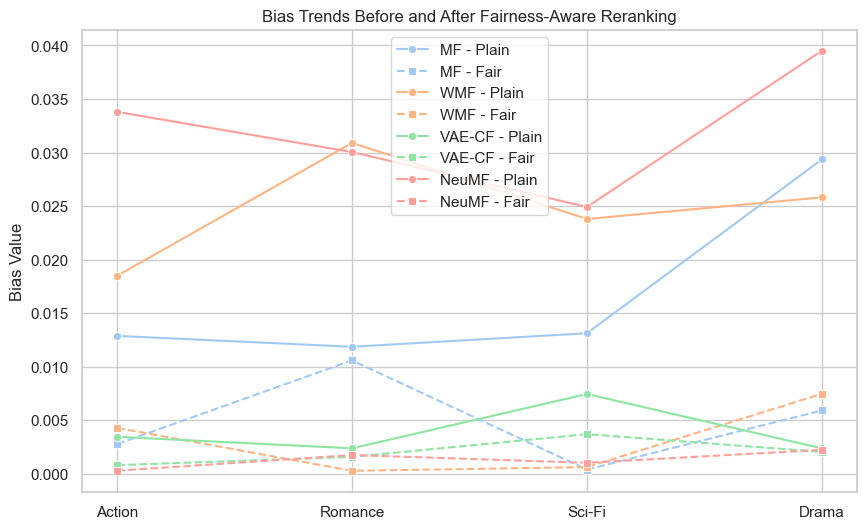

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]

# Bias values (before applying fairness)
bias_before_gender = np.array([
 [0.012863785468263077,
 0.011845402110327488,
 0.013110491498551202,
 0.029346832686384938],  # Model A
   [0.018484951615548625,
 0.030898524775390457,
 0.023785837297031327,
 0.025802325369489565],  # Model B
[0.003432562462413191,
 0.00235703351374994,
 0.0074310635467352,
 0.002357006177901716],  # Model C
 [0.03379556885900169,
 0.030044343301805984,
 0.024909049076959525,
 0.039503849798625895],  # Model D
])

# Bias values (after applying fairness)
bias_after_gender = np.array([
  [0.0027582827620141054,
 0.010573082390246569,
 0.0003701547209009892,
 0.005895877754086731],  # Model A
   [0.004260624533012597,
 0.00025552639731744875,
 0.0006021449528912232,
 0.0074438476117580366],  # Model B
   [0.0007875913472928375,
 0.0015551136260091442,
 0.003680648953037019,
 0.002022634082335578],  # Model C
   [0.0002617544147394957,
 0.0017281449893390283,
 0.0010022233156561505,
 0.002213647877826963],  # Model D
])
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Get Seaborn color palette
palette = sns.color_palette("pastel", len(models))  # Get distinct colors for models

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    sns.lineplot(x=categories, y=bias_before_gender[i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
    sns.lineplot(x=categories, y=bias_after_gender[i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)

ax.set_ylabel("Bias Value")
ax.set_title("Bias Trends Before and After Fairness-Aware Reranking")
ax.legend()
plt.show()

#gender


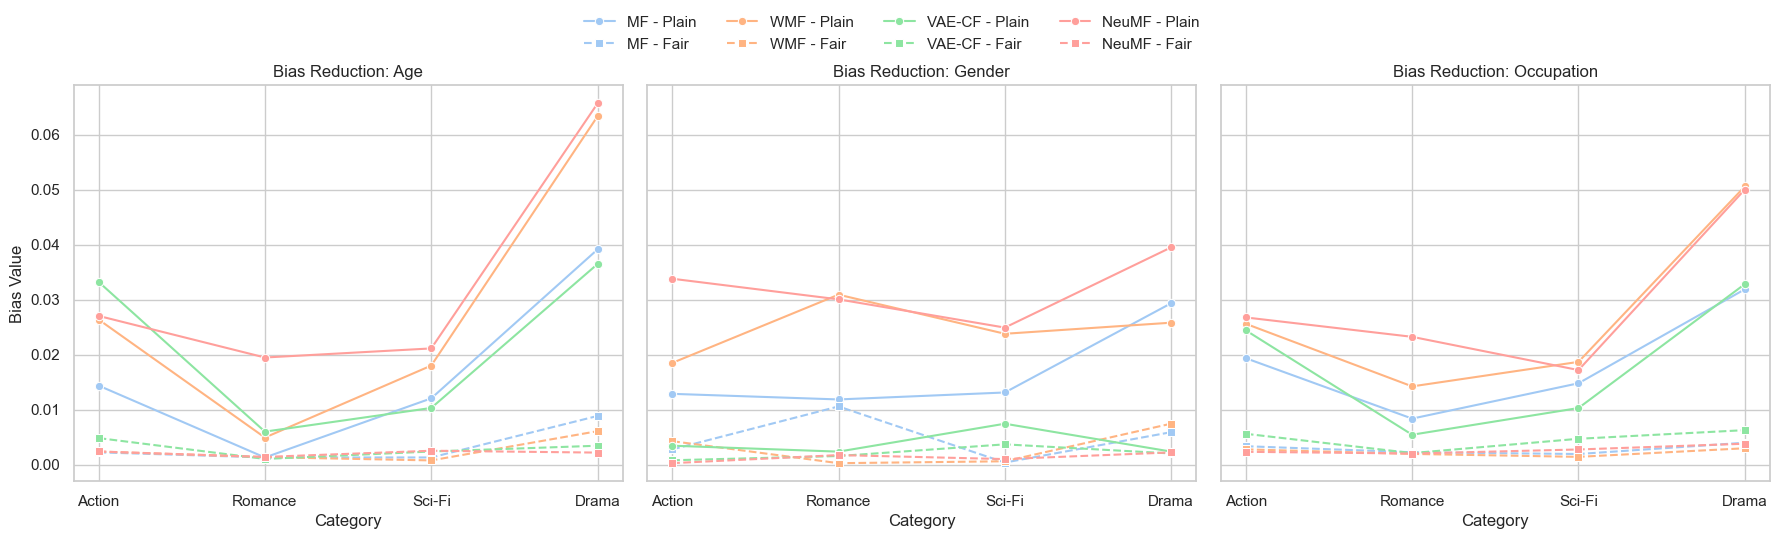

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]


# Set Seaborn style
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel", len(models))  # Pastel colors for consistency

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey=True keeps the same scale

titles = ["Bias Reduction: Age", "Bias Reduction: Gender", "Bias Reduction: Occupation"]

for idx, ax in enumerate(axes):
    for i, model in enumerate(models):
        sns.lineplot(x=categories, y=bias_before[idx][i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
        sns.lineplot(x=categories, y=bias_after[idx][i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)
    
    ax.set_title(titles[idx])  # Set title for each subplot
    ax.set_xlabel("Category")  # Label x-axis
    ax.set_ylabel("Bias Value" if idx == 0 else "")  # Label y-axis only for first plot
    ax.legend_.remove()

# Move legend outside
# axes[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
handles, labels = axes[0].get_legend_handles_labels()  # Get legend handles from first subplot
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.09), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig("biasReduction.pdf", format="pdf",bbox_inches="tight")
plt.show()


In [34]:
bias_before = [bias_before_age, bias_before_gender, bias_before_occ]
bias_after = [bias_after_age, bias_after_gender, bias_after_occ]

In [29]:
bias_before

[array([[0.01934422, 0.00835896, 0.01478647, 0.0318802 ],
        [0.0256016 , 0.01421897, 0.01867574, 0.05057249],
        [0.02440859, 0.005428  , 0.01028302, 0.03281925],
        [0.02675541, 0.02323254, 0.01718734, 0.05001549]]),
 array([[0.01286379, 0.0118454 , 0.01311049, 0.02934683],
        [0.01848495, 0.03089852, 0.02378584, 0.02580233],
        [0.00343256, 0.00235703, 0.00743106, 0.00235701],
        [0.03379557, 0.03004434, 0.02490905, 0.03950385]]),
 array([[0.00334065, 0.00224201, 0.0019235 , 0.00397791],
        [0.00276871, 0.00193933, 0.00140731, 0.00296763],
        [0.0055973 , 0.00208998, 0.00469341, 0.00626332],
        [0.00232531, 0.00201167, 0.00274858, 0.00379294]])]